In [1]:
# Linear Regression Tutorial: sample regression model for predicting house prices
# Shomik Jain, USC CAIS++

# Adapted From: https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

In [2]:
# Regression Problem: type of supervised learning where both the input and output are continuous
# Tutorial: predict the price of a house from house attributes
# Goal: Given a training set, learn a function h mapping house attributes to price using a linear model

In [3]:
# Part 1: Coded Implemenation of Linear Regression

In [4]:
import numpy as np
from sklearn.datasets import load_boston

In [5]:
# 1. Load Boston House Prices Data Set 

In [6]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
# Investigate shape of the input data array
data = boston.data
target = boston.target

print(data.shape)
print(target.shape)
print(boston.feature_names)

num_features = len(boston.feature_names)
num_samples = data.shape[0] # 506 training examples

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
# Use Pandas to get an overview of the training data

import pandas as pd
bos_dataframe = pd.DataFrame(boston.data)
bos_dataframe.columns = boston.feature_names
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Add in the target variable: price

bos_dataframe['PRICE'] = target
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# 2. Linear Regression Model

In [13]:
# randomly initialize weights between (-1, 1)
# weight: how much you want to weigh knowledge of particular house feature into final price prediction
weights_init = np.random.uniform(low=-1, high=1, size=num_features)
weights_init

array([ 0.72046488,  0.59198388,  0.00166604,  0.17057469, -0.90714249,
       -0.28233484,  0.89396319, -0.33160124,  0.09263618, -0.33281113,
       -0.04998916,  0.90315297,  0.38274099])

In [14]:
# initialize bias to 0
bias_init = 0

In [15]:
# Feature Scaling & Mean Normalization (speeds up optimization)
# => getting every feature into [-1, 1] with mean 0

for i in range(num_features):
    # For each feature: calculate mean and max
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    # Subtract mean, divide by maximum
    data[:, i] = (data[:, i]-feature_avg)/feature_max

In [16]:
# Hypothesis function: follows linear model   
# returns output vector of predicted prices

def hypothesis(weights, bias):
    return data.dot(weights) + np.repeat(bias, num_samples)

In [17]:
# check size, should match number of training examples
hypothesis(weights_init, bias_init).shape 

(506,)

In [18]:
# Cost function: measures the accuracy of the hypothesis function 
# describes how good model is with current weights/bias

# Mean Squared Error as cost function 
def cost(weights, bias):
    return np.mean(np.square(hypothesis(weights, bias) - target))/2
cost(weights_init, bias_init)

296.11552945001858

In [19]:
# Gradient function: calculates derivative of cost function W.R.T. particular weight
# return weight gradient vector, bias gradient at current step

def gradient(weights, bias):
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias)-target) * data[:, weight_num])
        weight_gradients.append(grad)
        
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - target)
    
    return (weight_gradients, bias_gradient)

In [20]:
# Check to make sure it works, initial gradient should be large
gradient(weights_init, bias_init)

(array([ 0.3453    , -0.76724172,  1.10001121, -0.39404198,  0.52275858,
        -0.51290202,  1.00831165, -0.40620229,  1.26243307,  1.01391958,
         0.45765777, -0.66743908,  1.28519296]), -22.53280632411067)

In [21]:
# 3. Training the Model
# Find best possible hypothesis function <=> find weights that minimize cost function

In [22]:
# Gradient descent: optimization (minimization) of cost function 
# Make steps down the cost function in direction of steepest descent 
    # Use negative of the gradient of cost function W.R.T. each parameter/weight
# At each step, simultaneously update the parameters & recalculate cost (should go down)

LEARNING_RATE = 0.01 # learning rate: how large each downward step will be

def gradient_descent(weights, bias, num_epochs):
    costs = []
    weights = weights
    bias = bias
    
    for i in range(num_epochs): 
        weights_gradient, bias_gradient = gradient(weights, bias)
        
        weights = weights - LEARNING_RATE * weights_gradient
        bias = bias - LEARNING_RATE * bias_gradient
        costs.append(cost(weights, bias))
        
    return costs, weights, bias

In [23]:
# How many epochs for gradient descent?
# Want to repeat gradient descent until "convergence", be wary of overfitting
# Overfitting: overly complicated function that "overfits" available data
    # does not generalize well to predict new data 
num_epochs = 1000 

In [24]:
# Train Model
costs, trained_weights, trained_bias = gradient_descent(weights_init, bias_init, num_epochs)

In [25]:
print(trained_weights)
print(trained_bias)

[-0.70375946  3.32348634 -3.66489752  3.07305153 -2.37800478  3.48008393
 -1.73200473 -0.70401423 -2.18108559 -3.32617268 -2.80195388  3.27673594
 -7.1249053 ]
22.5318335548


In [26]:
costs[-1] # ending MSE cost

23.196110519988959

In [27]:
# 4. Evaluating the Model

In [28]:
import matplotlib.pyplot as plt

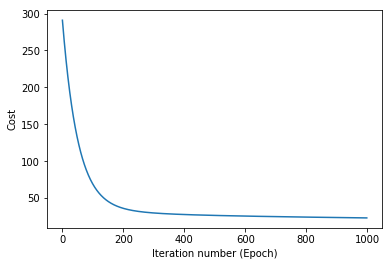

In [29]:
# Cost vs Epoch (Gradient Descent Step)  
# as number of epochs increase, cost should decrease 
plt.plot(costs)
plt.xlabel("Iteration number (Epoch)")
plt.ylabel("Cost")
plt.show()

In [30]:
# Final predicted prices
new_hypotheses = hypothesis(trained_weights, trained_bias)

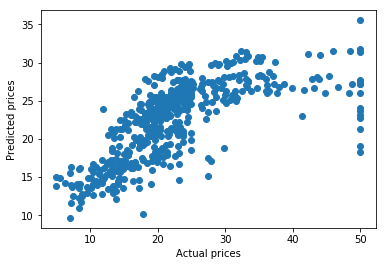

In [31]:
# Check if predictions, actual values are correlated
plt.scatter(target, new_hypotheses)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

In [32]:
# Part 2: Linear Regression using Sklearn built-in functionality

In [33]:
# 1. Simple Implementation of Sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [34]:
regr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Compare to coded implementation above
# Compare weights
print(regr.coef_)
print(trained_weights)

[ -9.53562887   4.63952195   0.57866304   2.6885614  -15.50010579
  33.4057266    0.07510617 -17.89578905   7.33572092  -8.76616522
 -20.9761982    3.7278883  -19.95196805]
[-0.70375946  3.32348634 -3.66489752  3.07305153 -2.37800478  3.48008393
 -1.73200473 -0.70401423 -2.18108559 -3.32617268 -2.80195388  3.27673594
 -7.1249053 ]


In [36]:
# Compare bias/intercept
print(regr.intercept_)
print(trained_bias)

22.5328063241
22.5318335548


In [37]:
# Compare error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target, regr.predict(data)))
print(mean_squared_error(target, new_hypotheses)) # sklearn doesn't divide by 2

21.8977792177
46.39222104


In [38]:
# 2. Train-Test Split 
# Assess model using test partition, data the model has not seen 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.25, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [39]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print(mean_squared_error(Y_train, regr.predict(X_train)))
print(mean_squared_error(Y_test, regr.predict(X_test)))

21.5147127322
24.2981057684


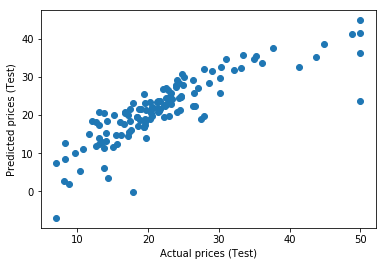

In [41]:
plt.scatter(Y_test, regr.predict(X_test))
plt.xlabel("Actual prices (Test)")
plt.ylabel("Predicted prices (Test)")
plt.show()

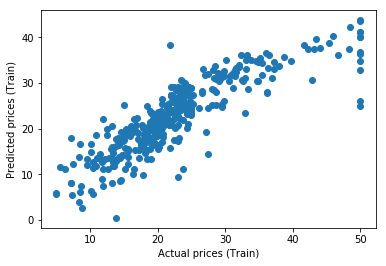

In [42]:
plt.scatter(Y_train, regr.predict(X_train))
plt.xlabel("Actual prices (Train)")
plt.ylabel("Predicted prices (Train)")
plt.show()

In [43]:
# 3. Regression Trees: similar to top-down flowcharts

# model asks a series of questions about the data
# based on answers, keeps filtering data into smaller groups with shared charactersitics
# predicts some feature value for each of those distinct groups

# training -- finding  feature split (question) that results in greatest decrease in final cost

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [45]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
mean_squared_error(Y_test, tree.predict(X_test))

31.170236220472443

In [47]:
# 4. Random Forest: multiple regression trees

# train multiple regression trees separately using different input features for each
# combine them into a final predictor at the end (ensemble)
# ensemble prevents overfitting (errors from different models balance)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [49]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
mean_squared_error(Y_test, rfr.predict(X_test))

9.3969685039370088

In [51]:
# 5. Gradient Boosting: smarter ensemble of regression trees

# create smaller regression trees iteratively (not in parallel, like random forest)
# for each new tree, figure out how to best create the tree => maximum reduction in overall error

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [53]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
mean_squared_error(Y_test, gbr.predict(X_test))

7.4364434265438391